In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mydata = pd.read_csv("Honey_Production.csv")

In [3]:
mydata.head(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


In [4]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
numcol,626.0,6.028435e+04,9.107709e+04,2000.00,9000.0000,26000.00,63750.00,510000.00
yieldpercol,626.0,6.200958e+01,1.945875e+01,19.00,48.0000,60.00,74.00,136.00
totalprod,626.0,4.169086e+06,6.883847e+06,84000.00,475000.0000,1533000.00,4175250.00,46410000.00
stocks,626.0,1.318859e+06,2.272964e+06,8000.00,143000.0000,439500.00,1489500.00,13800000.00
priceperlb,626.0,1.409569e+00,6.385989e-01,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,4.715741e+06,7.976110e+06,162000.00,759250.0000,1841500.00,4703250.00,69615000.00
year,626.0,2.004864e+03,4.317306e+00,1998.00,2001.0000,2005.00,2009.00,2012.00


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [6]:
#Finding how many states are included in the data set
mydata['state'].nunique()

44

In [7]:
#List of states included in the data set
mydata['state'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'SC'],
      dtype=object)

In [9]:
#Finding the average production by state
mydata[['state', 'totalprod']].groupby('state').mean().round()

,totalprod
state,
AL,825467.0
AR,2810400.0
AZ,2032267.0
CA,23169000.0
CO,1750600.0
FL,16469867.0
GA,3299933.0
HI,843133.0
IA,2080000.0


In [10]:
#Checking how many years of data is included in the data set
mydata['year'].nunique()

15

In [11]:
#Starting year
mydata['year'].min()

1998

In [14]:
#Final year
mydata['year'].max()

2012

In [15]:
#Finding which state has seen highest volume in production and in which year
mydata[mydata['totalprod']== mydata['totalprod'].max()][["state","year"]]

,state,year
532,ND,2010


In [16]:
#Finding what is the average yield per colony and for each year
mydata[['year', 'yieldpercol']].groupby('year').mean().round()

,yieldpercol
year,
1998,70.0
1999,65.0
2000,68.0
2001,65.0
2002,67.0
2003,63.0
2004,65.0
2005,64.0
2006,62.0


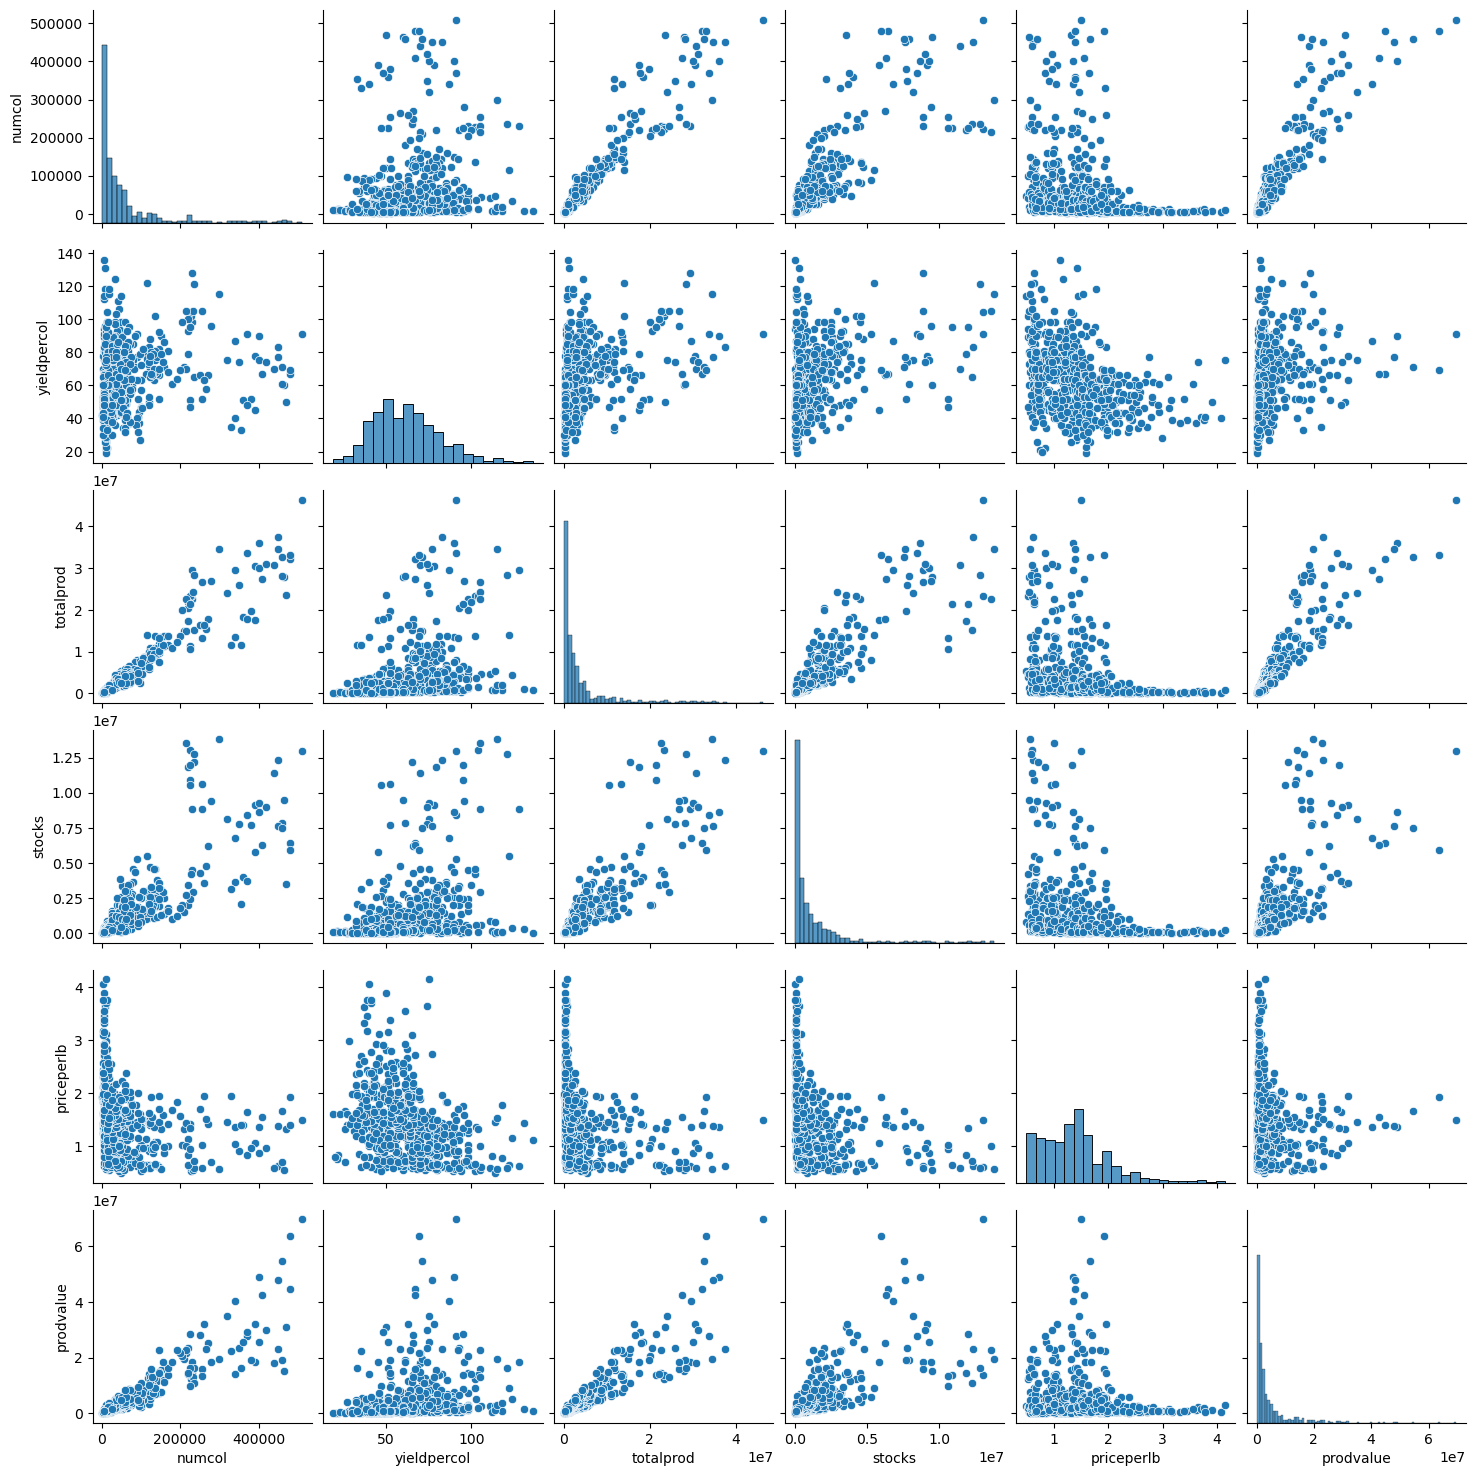

In [17]:
#Finding correlation between numerical variables in the data set
sns.pairplot(mydata[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']])

In [18]:
cor = mydata[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']].corr()

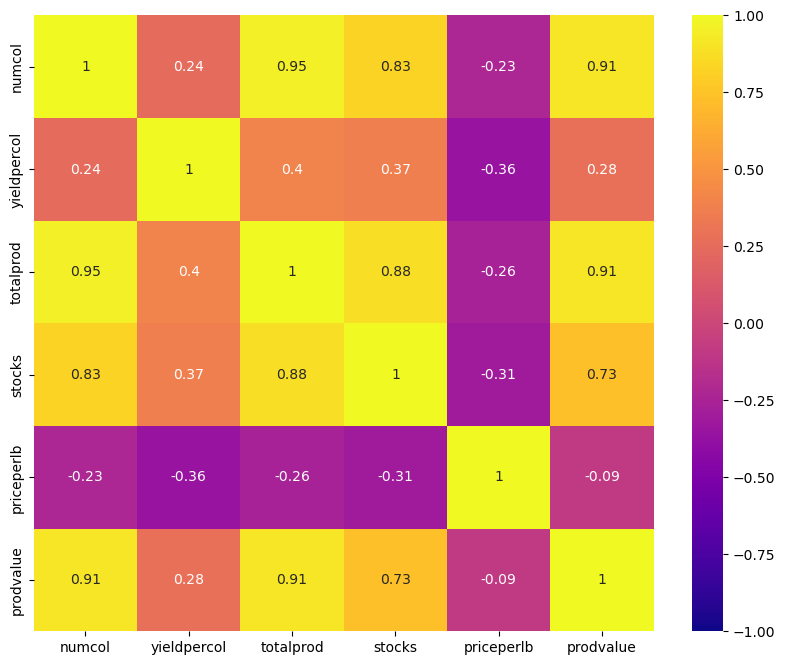

In [19]:
#numcol and totalprod have the highest correlation (95%)
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True, cmap='plasma',vmin=-1,vmax=1)
plt.show()

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


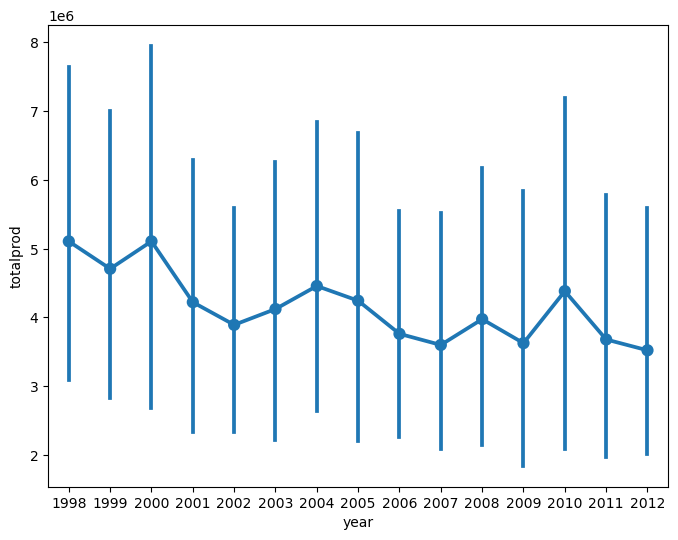

In [20]:
#Finding out what the Production trend for all the years in the data set
plt.figure(figsize=(8,6))
sns.pointplot(mydata['year'], mydata['totalprod'])
plt.show()

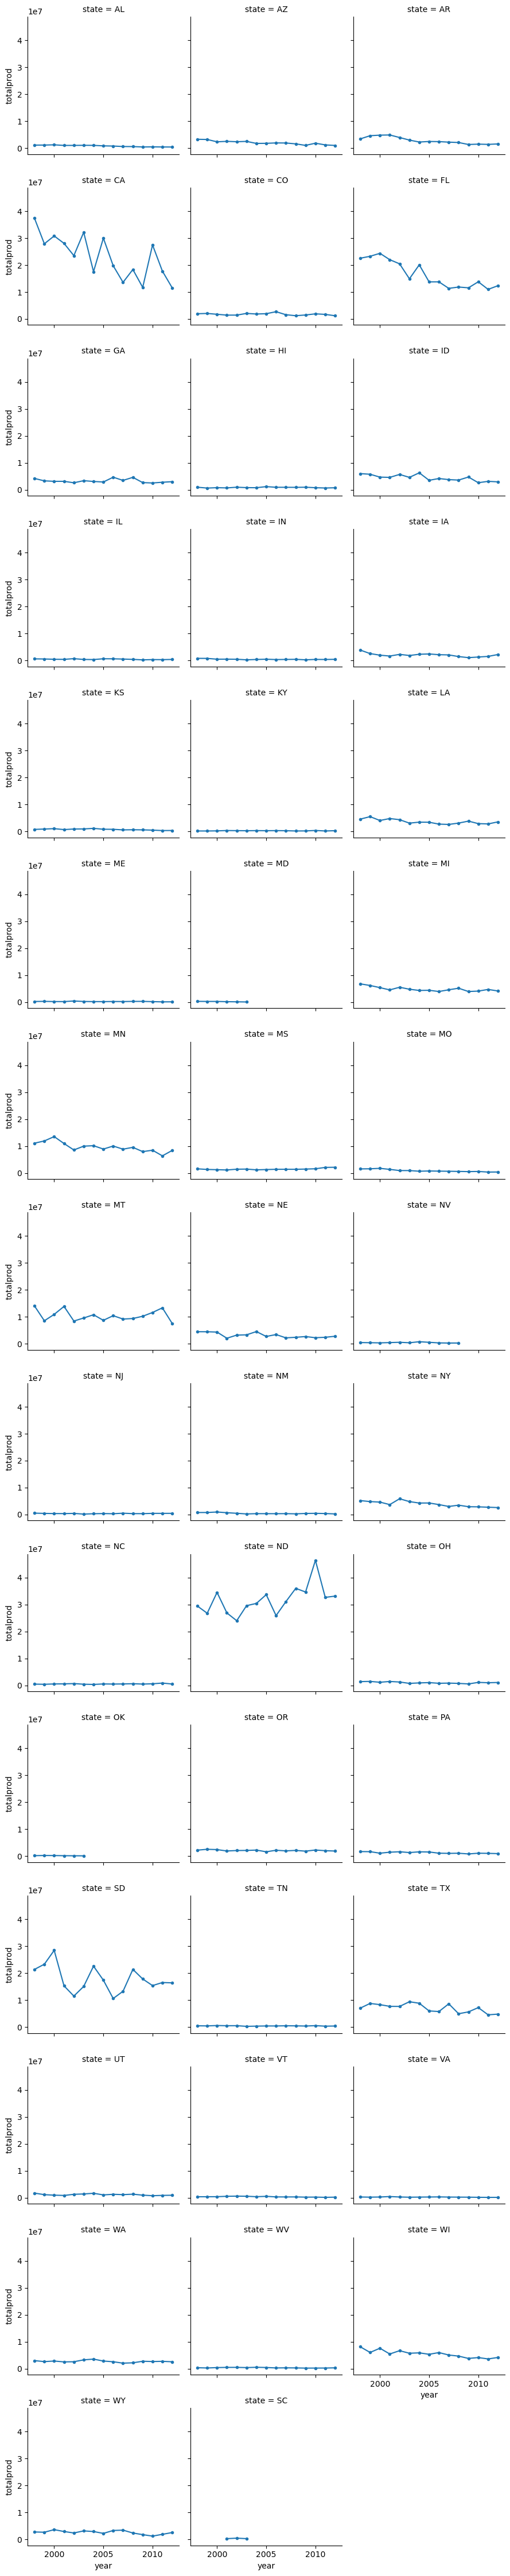

In [21]:
#Production trends by state
g = sns.FacetGrid(mydata, col="state", col_wrap=3, height=3)
g = g.map(plt.plot, "year", "totalprod", marker=".")
plt.show()

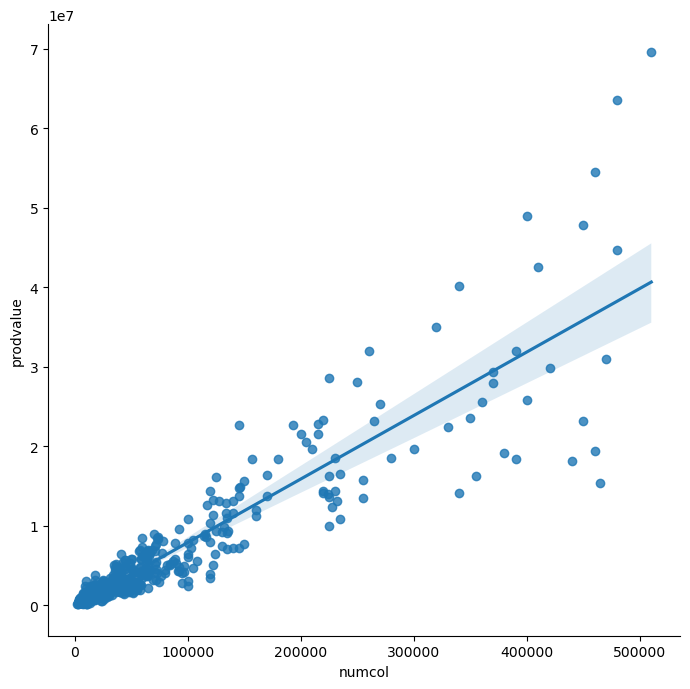

In [22]:
#Finding if there a linear relationship between the Number of Colonies & Value in Production
sns.lmplot(x="numcol", y="prodvalue", data=mydata,height=7)
plt.show()

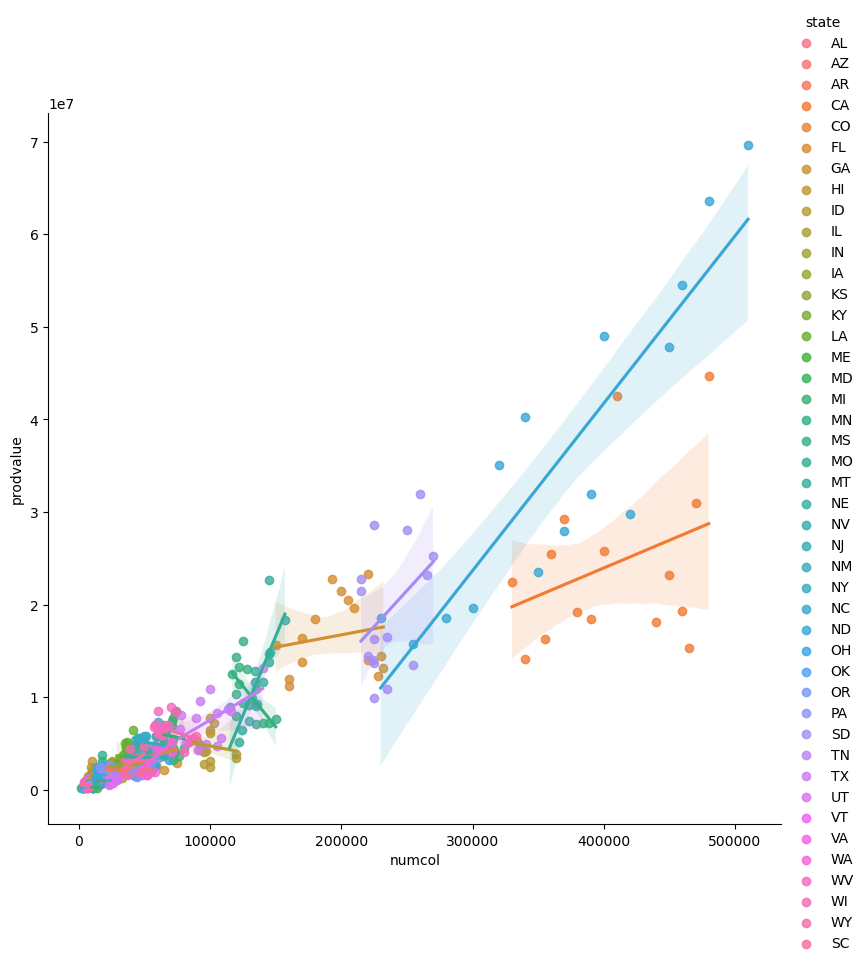

In [23]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata, hue='state',height=8,aspect=1)
plt.show()

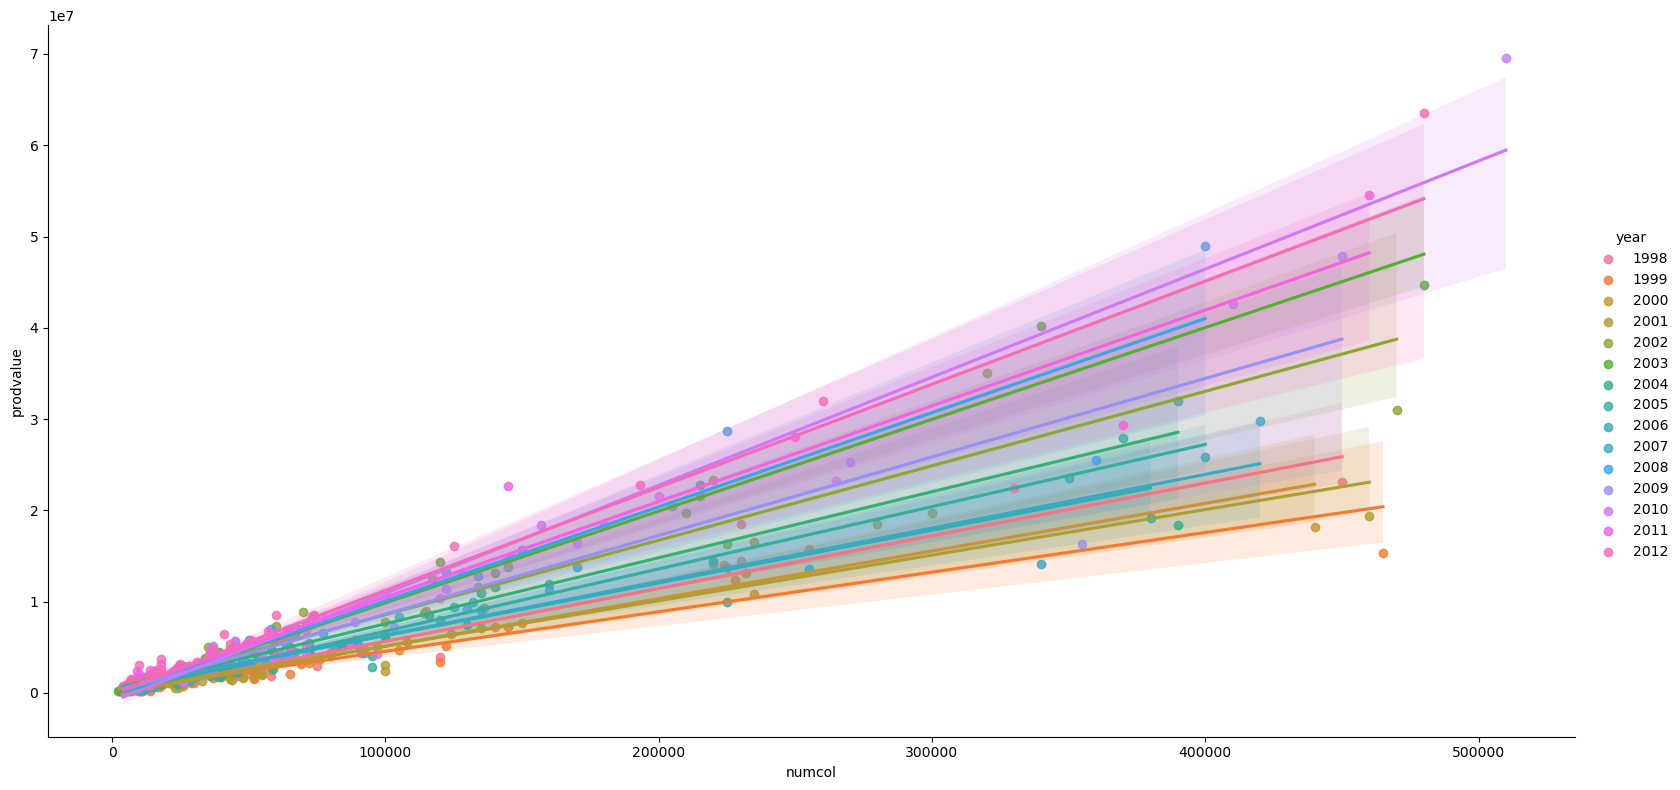

In [24]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata, hue='year',height=8,aspect=2)
plt.show()

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


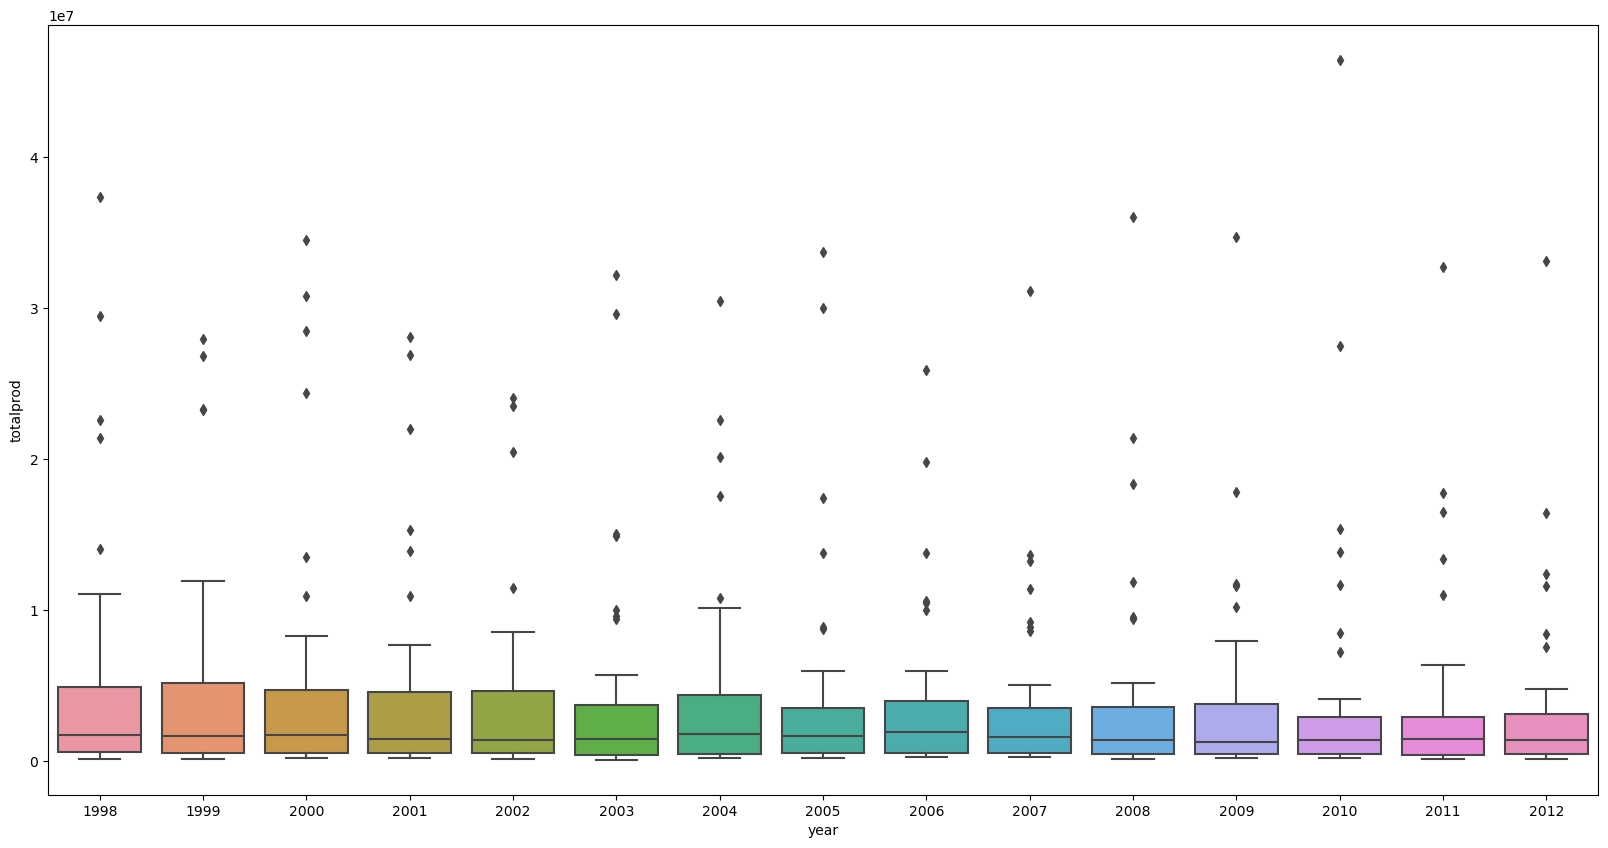

In [25]:
#Checking the distribution of total prodcution across each year using boxplots and looking for outliers if any
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot('year','totalprod',data=mydata)
plt.show()

C:\Users\arpit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='prodvalue'>

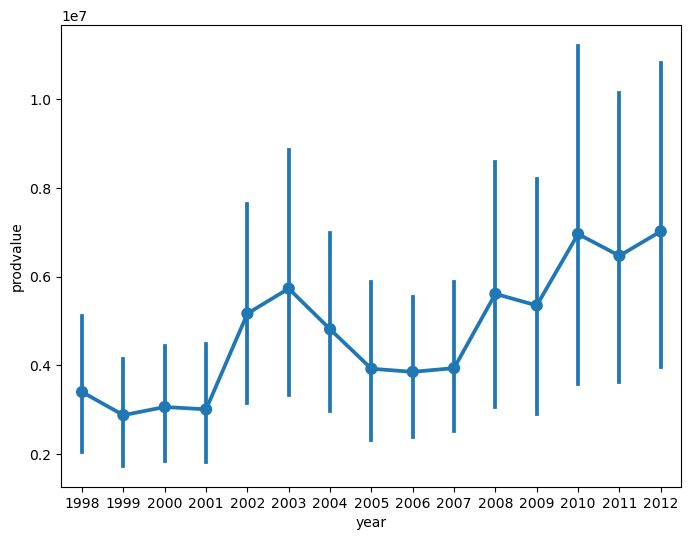

In [26]:
plt.figure(figsize=(8,6))
sns.pointplot(mydata['year'], mydata['prodvalue'])

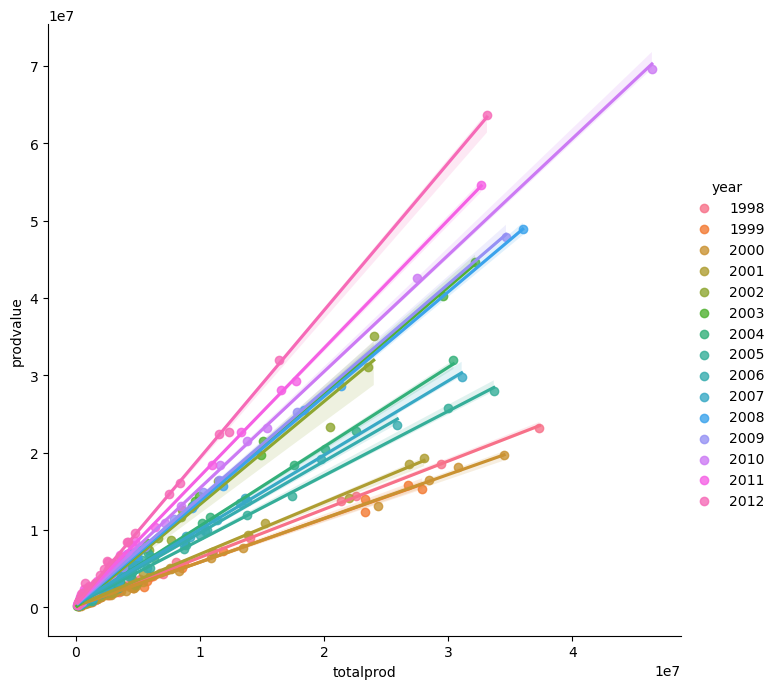

In [27]:
# Finding the linear relationship between Production volume & value over the years
sns.lmplot(x="totalprod", y="prodvalue",hue='year', data=mydata,height=7)